In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sidetable

# Pair Programming Intro Machine Learning

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.

- Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

Utilizamos el conjunto de datos "Socio-Economic Country Profiles".

## Objetivos

Los objetivos de hoy son:

1. Buscar un conjunto de datos a analizar:

    Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv('datos/soci_econ_country_profiles.csv', index_col=0)

In [4]:
df.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Gross Rental Yield City Center,Gross Rental Yield Outside Center,Property Price to Rent Ratio City Center,Property Price to Rent Ratio Outside Center,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Access to electricity (% of population),Adjusted net national income per capita (constant 2010 US$),Age dependency ratio (% of working-age population),"Air transport, freight (million ton-km)","Air transport, passengers carried",Commercial service exports (current US$),Commercial service imports (current US$),Consumer price index (2010 = 100),Current account balance (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Gross domestic savings (% of GDP),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6.0,27.8,66.2,2.0,24.8,73.1,6.5,48.6/74.4,119,119,57733,55610,2124,-15944,1.0,91.8,1.0,2.3,24.9/15.4,2086.3/4.8,5.0,13.7,4.8,3.8,5.3,109.8/110.2,110.3/103.4,102.9/63.5,38.9,143.9,69.4,256,10.0,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99,139.59,58.40,37.37,73.30,52.57,12.07,37.95,53.33,90.67,3.77,3.90,26.53,25.64,333.23,0.30,52.57,13.92,34.05,44.06,50.37,58.40,100.0,909

In [5]:
df.shape

(66, 95)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 95 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   country                                                      66 non-null     object 
 1   Region                                                       66 non-null     object 
 2   Surface area (km2)                                           66 non-null     int64  
 3   Population in thousands (2017)                               66 non-null     int64  
 4   Population density (per km2, 2017)                           66 non-null     float64
 5   Sex ratio (m per 100 f, 2017)                                66 non-null     float64
 6   GDP: Gross domestic product (million current US$)            66 non-null     int64  
 7   GDP growth rate (annual %, const. 2005 prices)               66 non-null     float

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Surface area (km2),66.0,1.383839e+06,3.110735e+06,7.190000e+02,6.536700e+04,2.840535e+05,7.929618e+05,1.709825e+07
Population in thousands (2017),66.0,8.655136e+04,2.381736e+05,1.180000e+03,7.155000e+03,1.886700e+04,6.588150e+04,1.409517e+06
"Population density (per km2, 2017)",66.0,3.677606e+02,1.296705e+03,3.200000e+00,4.672500e+01,1.041000e+02,2.113250e+02,8.155500e+03
"Sex ratio (m per 100 f, 2017)",66.0,1.030939e+02,3.266186e+01,8.510000e+01,9.545000e+01,9.735000e+01,1.001500e+02,3.012000e+02
GDP: Gross domestic product (million current US$),66.0,1.054143e+06,2.626195e+06,1.005200e+04,1.668350e+05,3.052720e+05,7.422105e+05,1.803665e+07
"GDP growth rate (annual %, const. 2005 prices)",66.0,2.503030e+00,4.084077e+00,-9.900000e+00,1.425000e+00,2.400000e+00,3.775000e+00,2.630000e+01
GDP per capita (current US$),66.0,2.353165e+04,2.058232e+04,1.410400e+03,6.253775e+03,1.532350e+04,4.039855e+04,8.083110e+04
Economy: Industry (% of GVA),66.0,2.968939e+01,8.588152e+00,7.200000e+00,2.407500e+01,2.845000e+01,3.487500e+01,5.640000e+01
Economy: Services and other activity (% of GVA),66.0,6.539848e+01,1.036784e+01,4.350000e+01,5.932500e+01,6.565000e+01,7.240000e+01,9.270000e+01
Employment: Agriculture (% of employed),66.0,1.057576e+01,1.098157e+01,2.000000e-01,2.700000e+00,6.000000e+00,1.477500e+01,4.430000e+01


In [8]:
df.describe(include ="object").T

,count,unique,top,freq
country,66,66,Argentina,1
Region,66,14,EasternEurope,9
Economy: Agriculture (% of GVA),66,44,2.3,4
Labour force participation (female/male pop. %),66,66,48.6/74.4,1
Population growth rate (average annual %),66,34,1.2,5
Urban population growth rate (average annual %),66,32,1.0,5
"Population age distribution (0-14 / 60+ years, %)",66,66,24.9/15.4,1
International migrant stock (000/% of total pop.),66,66,2086.3/4.8,1
Refugees and others of concern to UNHCR (in thousands),66,66,5.0,1
Health: Physicians (per 1000 pop.),66,36,...,6


2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
    - Esto se hace para que comprendais mejor los datos con los que estais trabajando.
    - Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [9]:
df_object = df.select_dtypes(include='object')
columnas_object = df_object.columns.to_list()

In [10]:
for col in columnas_object:
    print(col)
    print(df[col].unique())
    print('---------------------')

country
['Argentina' 'Australia' 'Austria' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China, Hong Kong SAR' 'China' 'Colombia' 'Croatia' 'Cyprus' 'Czechia'
 'Denmark' 'Egypt' 'Estonia' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'India' 'Indonesia' 'Iran (Islamic Republic of)' 'Ireland'
 'Israel' 'Italy' 'Japan' 'Jordan' 'Lebanon' 'Lithuania' 'Malaysia'
 'Mexico' 'Netherlands' 'New Zealand' 'Norway' 'Pakistan' 'Philippines'
 'Poland' 'Portugal' 'Qatar' 'Republic of Korea' 'Romania'
 'Russian Federation' 'Saudi Arabia' 'Serbia' 'Singapore' 'Slovakia'
 'Slovenia' 'South Africa' 'Spain' 'Sri Lanka' 'Sweden' 'Switzerland'
 'Thailand' 'The former Yugoslav Republic of Macedonia' 'Turkey' 'Ukraine'
 'United Arab Emirates' 'United Kingdom' 'United States of America'
 'Venezuela (Bolivarian Republic of)' 'Vietnam']
---------------------
Region
['SouthAmerica' 'Oceania' 'WesternEurope' 'EasternEurope' 'SouthernEurope'
 'NorthernAmerica' 'EasternAsia

In [11]:
df[['Labour force participation (female pop. %)', 'Labour force participation (male pop. %)']] = df['Labour force participation (female/male pop. %)'].str.split('/', expand=True)
df.drop('Labour force participation (female/male pop. %)', axis=1, inplace=True)

In [12]:
df[['Education: Primary gross enrol. ratio (f per 100 pop.)', 'Education: Primary gross enrol. ratio (m per 100 pop.)']] = df['Education: Primary gross enrol. ratio (f/m per 100 pop.)'].str.split('/', expand=True)
df.drop('Education: Primary gross enrol. ratio (f/m per 100 pop.)', axis=1, inplace=True)

In [13]:
df[['Education: Secondary gross enrol. ratio (f per 100 pop.)', 'Education: Secondary gross enrol. ratio (m per 100 pop.)']] = df['Education: Secondary gross enrol. ratio (f/m per 100 pop.)'].str.split('/', expand=True)
df.drop('Education: Secondary gross enrol. ratio (f/m per 100 pop.)', axis=1, inplace=True)

In [14]:
df[['Education: Tertiary gross enrol. ratio (f per 100 pop.)', 'Education: Tertiary gross enrol. ratio (m per 100 pop.)']] = df['Education: Tertiary gross enrol. ratio (f/m per 100 pop.)'].str.split('/', expand=True)
df.drop('Education: Tertiary gross enrol. ratio (f/m per 100 pop.)', axis=1, inplace=True)

In [15]:
df[['Pop. using improved drinking water (urban, %)', 'Pop. using improved drinking water (rural, %)']] = df['Pop. using improved drinking water (urban/rural, %)'].str.split('/', expand=True)
df.drop('Pop. using improved drinking water (urban/rural, %)', axis=1, inplace=True)

In [16]:
df['Forested area (% of land area)'] = df['Forested area (% of land area)'].apply(lambda x: x.split('/')[1])

In [17]:
df['Energy supply per capita (Gigajoules)'] = df['Energy supply per capita (Gigajoules)'].apply(lambda x: x.split('/')[0])

In [18]:
df[['Population age distribution (0-14, %)', 'Population age distribution (60+ years, %)']] = df['Population age distribution (0-14 / 60+ years, %)'].str.split('/', expand=True)
df.drop('Population age distribution (0-14 / 60+ years, %)', axis=1, inplace=True)

In [19]:
df['International migrant stock (% of total pop.)'] = df['International migrant stock (000/% of total pop.)'].apply(lambda x: x.split('/')[1])
df.drop('International migrant stock (000/% of total pop.)', axis=1, inplace=True)

In [20]:
df_object = df.select_dtypes(include='object')
columnas_object = df_object.columns.to_list()

In [21]:
for col in columnas_object:
    df[col].replace(to_replace='~0.0', value='0.0', inplace=True)
    df[col].replace(to_replace='...', value=np.nan, inplace=True)
    df[col].replace(to_replace='-~0.0', value='0.0', inplace=True)
    df[col].replace(to_replace='-99', value=np.nan, inplace=True)

In [22]:
columnas_numeric = df.select_dtypes(include = np.number).drop('Quality Of Life Index', axis=1)

In [23]:
for col in columnas_numeric:
    df[col].replace(to_replace=-99, value=np.nan, inplace=True)

In [24]:
for col in columnas_object:
    print(col)
    print(df[col].unique())
    print('---------------------')

country
['Argentina' 'Australia' 'Austria' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China, Hong Kong SAR' 'China' 'Colombia' 'Croatia' 'Cyprus' 'Czechia'
 'Denmark' 'Egypt' 'Estonia' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'India' 'Indonesia' 'Iran (Islamic Republic of)' 'Ireland'
 'Israel' 'Italy' 'Japan' 'Jordan' 'Lebanon' 'Lithuania' 'Malaysia'
 'Mexico' 'Netherlands' 'New Zealand' 'Norway' 'Pakistan' 'Philippines'
 'Poland' 'Portugal' 'Qatar' 'Republic of Korea' 'Romania'
 'Russian Federation' 'Saudi Arabia' 'Serbia' 'Singapore' 'Slovakia'
 'Slovenia' 'South Africa' 'Spain' 'Sri Lanka' 'Sweden' 'Switzerland'
 'Thailand' 'The former Yugoslav Republic of Macedonia' 'Turkey' 'Ukraine'
 'United Arab Emirates' 'United Kingdom' 'United States of America'
 'Venezuela (Bolivarian Republic of)' 'Vietnam']
---------------------
Region
['SouthAmerica' 'Oceania' 'WesternEurope' 'EasternEurope' 'SouthernEurope'
 'NorthernAmerica' 'EasternAsia

In [25]:
for col in columnas_object:
    df[col] = df[col].astype('float64', errors='ignore')


In [26]:
df.stb.missing()

,missing,total,percent
Net Official Development Assist. received (% of GNI),66,66,100.000000
"Pop. using improved sanitation facilities (urban/rural, %)",40,66,60.606061
Education: Government expenditure (% of GDP),10,66,15.151515
"Taxes on income, profits and capital gains (% of revenue)",9,66,13.636364
Tax revenue (% of GDP),8,66,12.121212
"Air transport, freight (million ton-km)",8,66,12.121212
Health: Physicians (per 1000 pop.),7,66,10.606061
"Air transport, passengers carried",5,66,7.575758
Education: Tertiary gross enrol. ratio (m per 100 pop.),5,66,7.575758
Education: Tertiary gross enrol. ratio (f per 100 pop.),5,66,7.575758


In [27]:
df.drop(["Taxes on income, profits and capital gains (% of revenue)", "Air transport, freight (million ton-km)", 
         "Tax revenue (% of GDP)", "Health: Physicians (per 1000 pop.)", "Education: Government expenditure (% of GDP)", 
         "Pop. using improved sanitation facilities (urban/rural, %)"], axis=1, inplace=True)

In [28]:
df_corr = df.corr()

Eliminamos las columnas con una correlación menor a 0.3 (valor absoluto)

In [36]:
df_corr_qol = df_corr.loc['Quality Of Life Index'].reset_index()
df_corr_baja = df_corr_qol[(df_corr_qol['Quality Of Life Index'] > -0.3) & ((df_corr_qol['Quality Of Life Index'] < 0.3))]

In [38]:
col_drop2 = df_corr_baja['index'].to_list()
df.drop(columns=col_drop2, inplace=True)

In [39]:
df.drop('Net Official Development Assist. received (% of GNI)', axis=1, inplace=True)

In [42]:
col_drop3 = [ 'Mobile-cellular subscriptions (per 100 inhabitants).1',
             'Economy: Agriculture (% of GVA)', 'Economy: Industry (% of GVA)', 'Economy: Services and other activity (% of GVA)' ]

In [43]:
df.drop(columns=col_drop3, inplace=True)

In [44]:
df.drop(["Life expectancy at birth, female (years)", "Life expectancy at birth, male (years)"], axis =1, inplace = True)

In [45]:
df.shape

(66, 47)

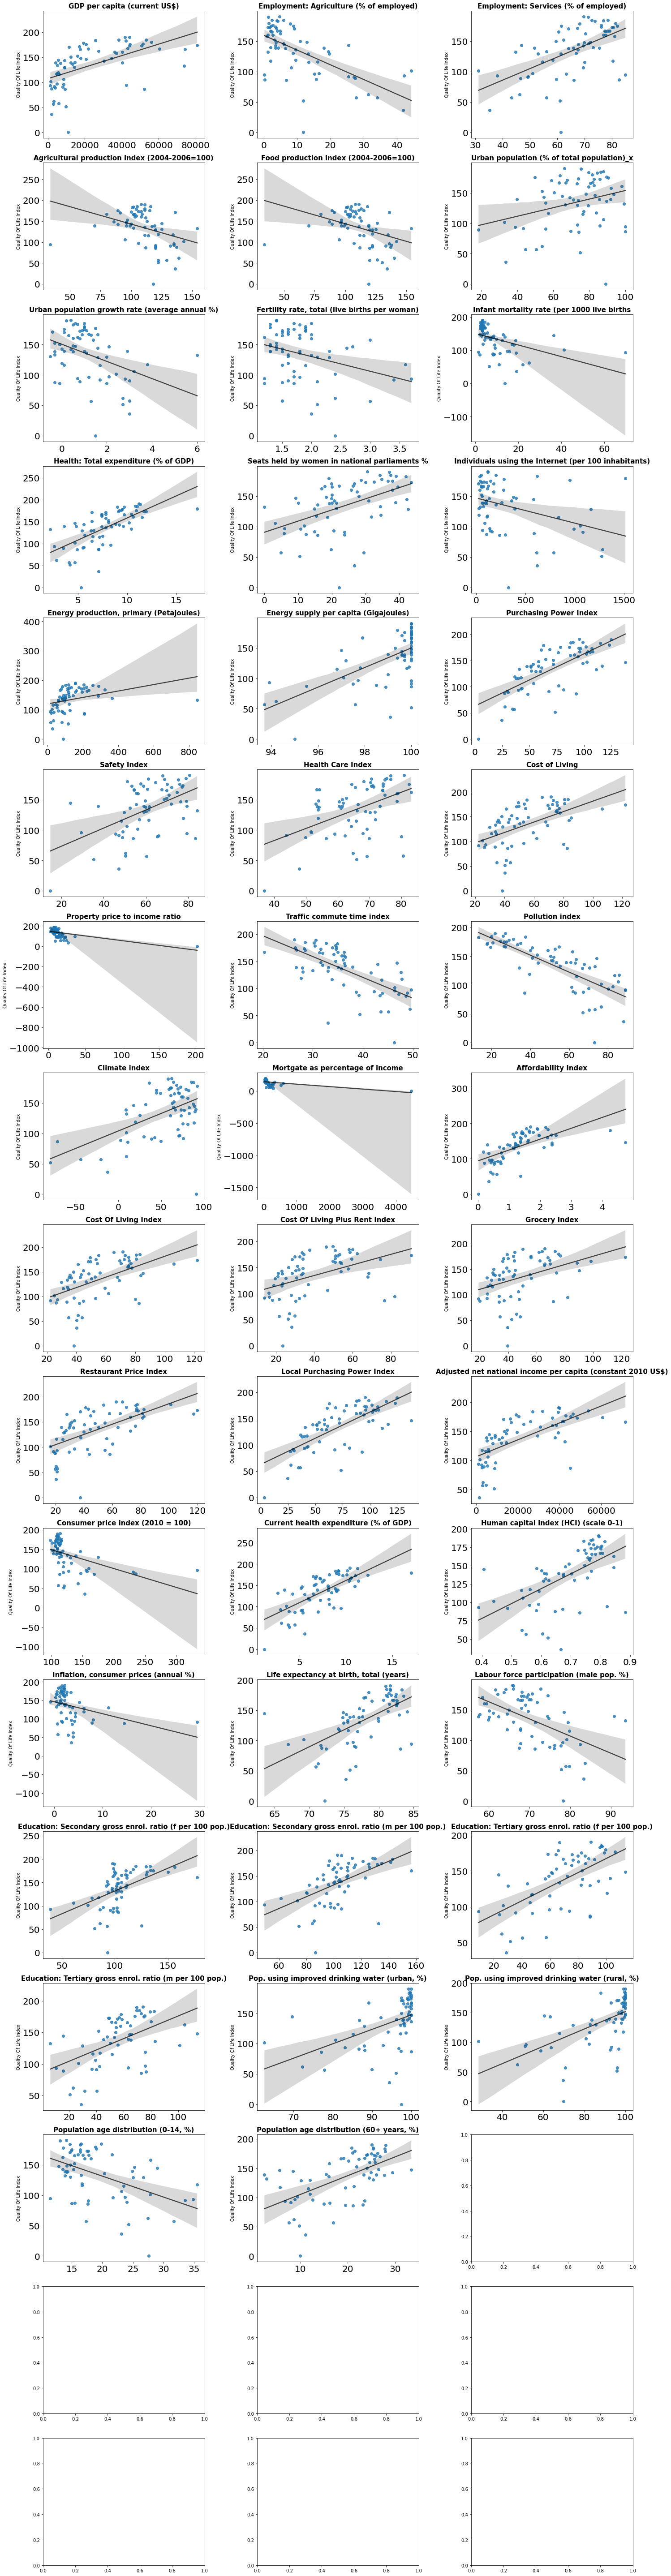

In [46]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 17, ncols = 3, figsize = (20, 80))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('Quality Of Life Index', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'Quality Of Life Index',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

In [ ]:
df.head(1)

,country,Region,Population in thousands (2017),GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),Population growth rate (average annual %),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),Forested area (% of land area),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Adjusted net national income per capita (constant 2010 US$),Commercial service exports (current US$),Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),Education: Secondary gross enrol. ratio (f per 100 pop.),Education: Secondary gross enrol. ratio (m per 100 pop.),Education: Tertiary gross enrol. ratio (f per 100 pop.),Education: Tertiary gross enrol. ratio (m per 100 pop.),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)"
0,Argentina,SouthAmerica,44271,14564.5,2.0,73.1,119,119,1.0,91.8,1.0,2.3,13.7,4.8,38.9,256,4.7,85,99.0,139.59,58.4,37.37,73.3,52.57,12.07,37.95,53.33,90.67,333.23,0.3,52.57,13.92,34.05,44.06,50.37,58.4,9094.367252,1.527416e+10,112.887108,9.124315,0.611,NaN,76.372,74.4,110.3,103.4,102.9,63.5,96.2,98.3,24.9,15.4


In [ ]:
df.shape

(66, 52)

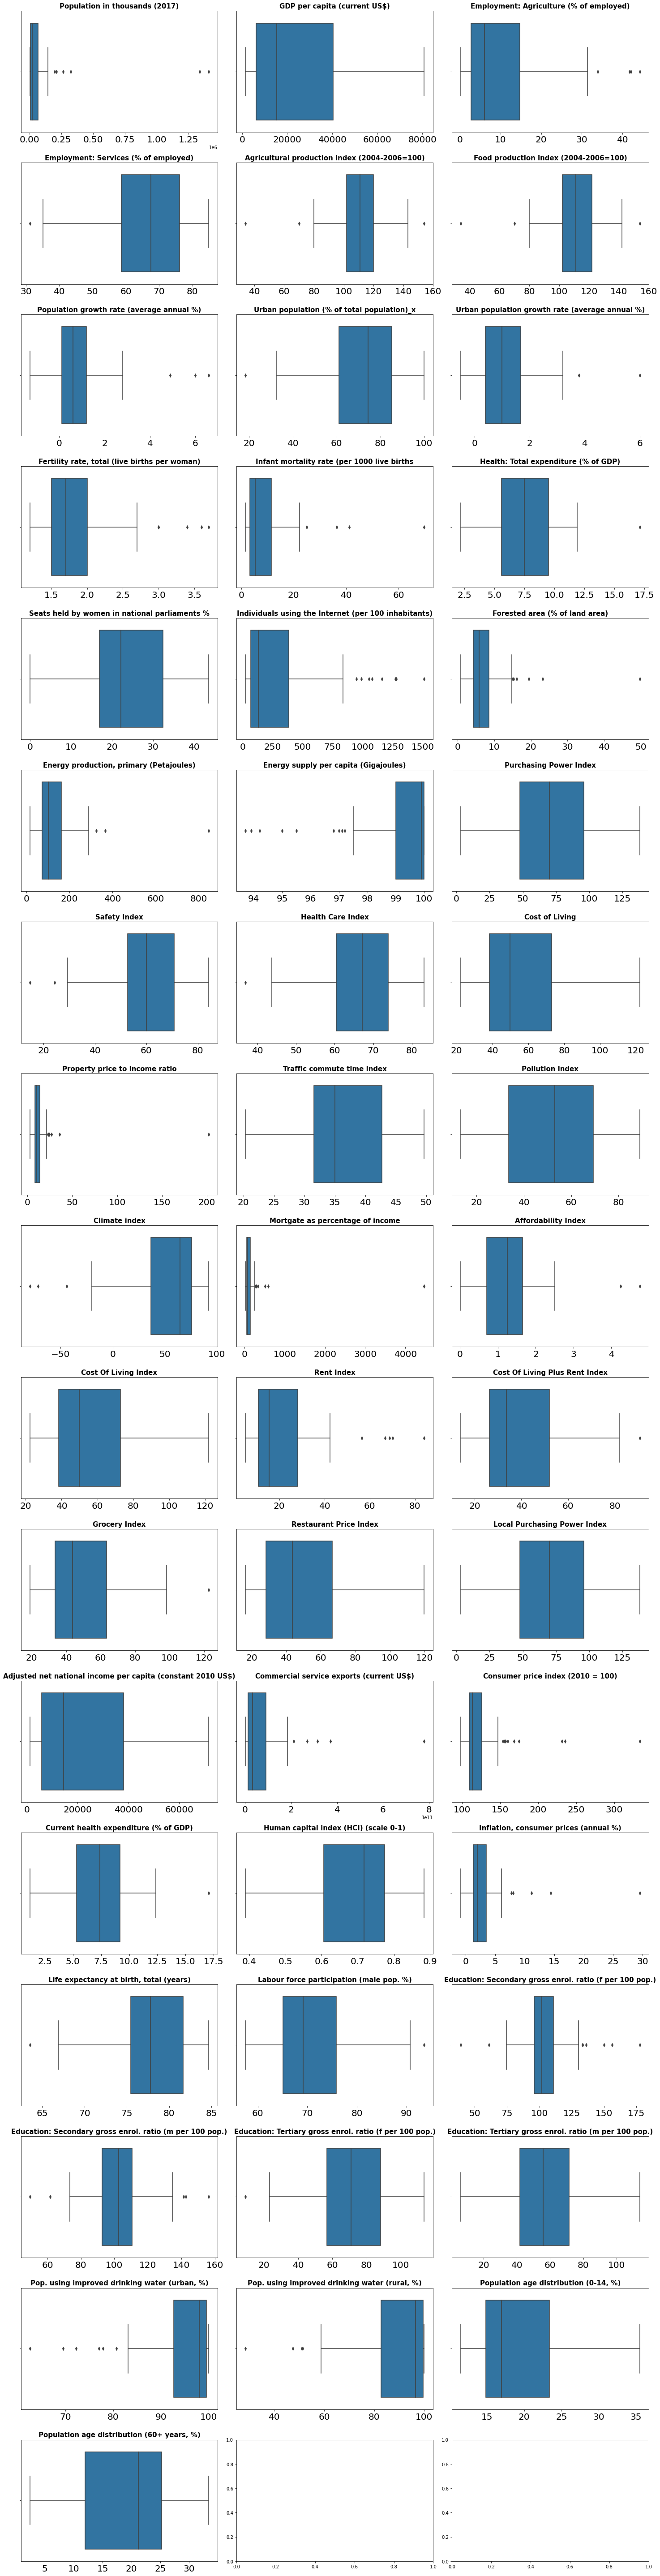

In [ ]:
fig, axes = plt.subplots(nrows = 17, ncols = 3, figsize = (20, 80))
axes = axes.flat
for i, colum in enumerate(columnas_numeric):
    sns.boxplot(data = df,
                x = colum,
                ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.tight_layout();

In [ ]:
df[["country", "Population in thousands (2017)"]].sort_values(by= "Population in thousands (2017)", ascending=False)

,country,Population in thousands (2017)
11,China,1409517
24,India,1339180
63,United States of America,324460
25,Indonesia,263991
6,Brazil,209288
39,Pakistan,197016
46,Russian Federation,143990
35,Mexico,129163
30,Japan,127484
40,Philippines,104918
